# The Porto Seguro kaggle challenge

## 1. Data Description

In this competition, you will predict the probability that an auto insurance policy holder files a claim.

In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., `ind` , `reg`, `car`, `calc`). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

## 2. File descriptions

- `train.csv` contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.
- `test.csv` contains the test data.

## 3. Aim

- Build a classifier using the training dataset that leads to a good ROC and Precision / Recall curve on the testing set
- The notebook should describe your steps, explain what you do and should run entirely without bugs. It should contain some descriptive statistics and quick study, to understand some things about the data...
- It must end with plots of the ROC and precision/recall curves obtained on the testing dataset

In [31]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from sklearn.impute import SimpleImputer

# Use the path to your filename

#Chemin Kenny
path = ''

#Chemin Mickaël
#path = '/home/chopin/Bureau/M2MOdata/machine_learning/tp2challenge'

df = pd.read_csv(os.path.join(path, 'train.csv'))
df.head(10)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


In [32]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
lignes = df.shape[0]
colonnes = df.shape[1]
print("Le jeu de données de training contient {0} lignes et {1} colonnes".format(lignes, colonnes))

Le jeu de données de training contient 595212 lignes et 59 colonnes


# 1. Analyse exploratoire des données

## 1)	Etude des données brutes

### Données manquantes

In [34]:
#df.isnull()
Nombre_de_donnees_manquantes=df.isna().sum()
Nombre_de_donnees_manquantes

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


Aucune donnée manquante n'a été détectée ici. Il n'y a donc que celles qui ont codées par la valeur -1. On relève donc les données manquantes en changeant les -1 en NaN et via le test isna()

In [35]:
donnees=df.replace(-1, np.NaN)

In [36]:
Nombre_de_donnees_manquantes=donnees.isna().sum()
Nombre_de_donnees_manquantes

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


Faisons une liste des features ayant des données manquantes :

In [37]:
val_manquantes=donnees.columns[donnees.isna().any()].tolist()
val_manquantes

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_05_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14']

Visualisons les données manquantes :

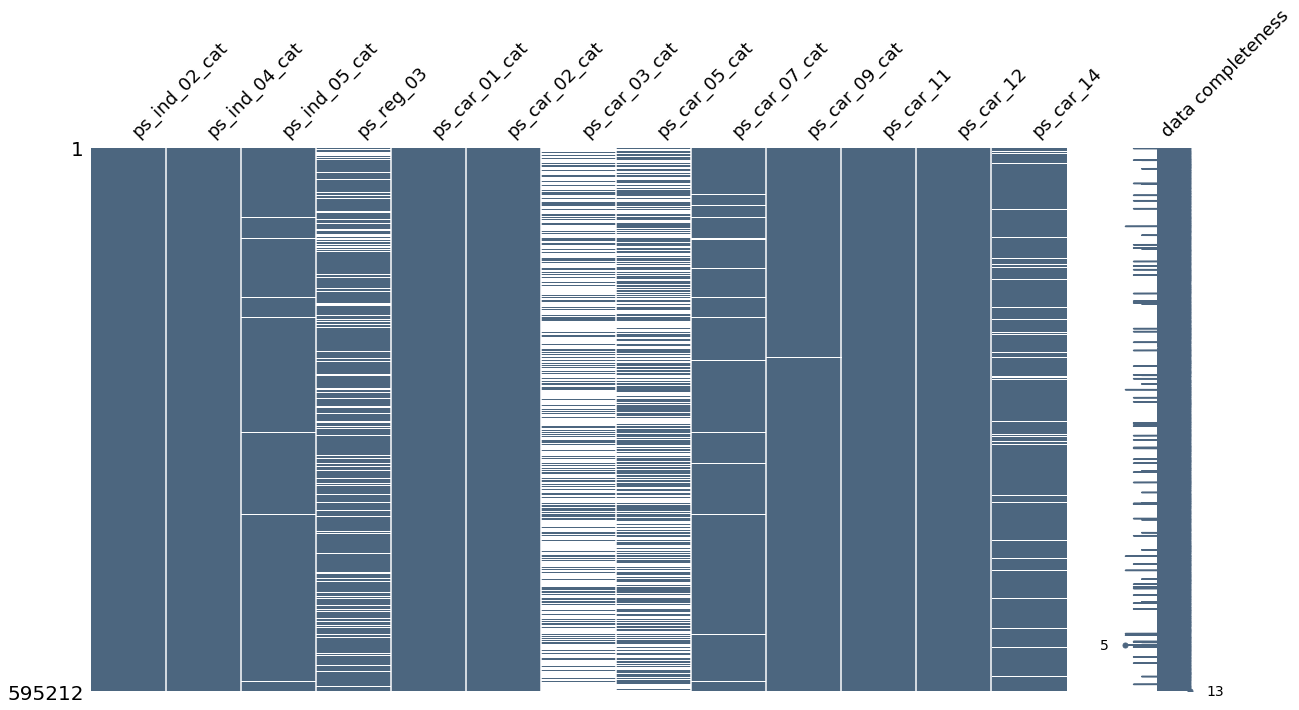

In [38]:
import missingno as msno
msno.matrix(donnees[val_manquantes],width_ratios=(10,1),figsize=(20,10),color=(0.3,0.4,0.5),fontsize=18,\
            sparkline=True,labels=True)

Calculons les pourcentages de données manquantes :

In [39]:
donnees_copy = (Nombre_de_donnees_manquantes / len(donnees)) * 100 
donnees_copy = donnees_copy.drop(donnees_copy[donnees_copy == 0].index).sort_values(ascending=False)[:30]
# Rajouter une colonne avec le nombre de NaN avec pd.concat
manquantes = pd.DataFrame({'Données manquantes en %' :donnees_copy})
manquantes

,Données manquantes en %
ps_car_03_cat,69.089837
ps_car_05_cat,44.782531
ps_reg_03,18.106490
ps_car_14,7.160474
ps_car_07_cat,1.930237
ps_ind_05_cat,0.975955
ps_car_09_cat,0.095596
ps_ind_02_cat,0.036290
ps_car_01_cat,0.017977
ps_ind_04_cat,0.013945


Les features ps_car_03_cat et ps_car_05_cat ont trop de valeurs manquantes. On va donc les supprimer :

In [40]:
c1 = donnees.shape[1]
dropfeat1 = donnees.pop('ps_car_03_cat')
dropfeat2 = donnees.pop('ps_car_05_cat')
dropfeat2 = donnees.pop('ps_reg_03')
c3 = donnees.shape[1]
print("On a bien supprimé " + str(c1-c3)+ " features")

On a bien supprimé 2 features


On supprime également la colonne id (à cause de sa valeur prédictive nulle) :

In [41]:
_ = donnees.pop('id')
donnees.shape[1]

56

Remplissage des données manquantes en remplaçant les NaN par la moyenne des valeurs de la colonne :

In [42]:
remp = SimpleImputer(missing_values=np.NaN, strategy="mean")

donnees['ps_car_11']=remp.fit_transform(donnees[['ps_car_11']]).ravel()
donnees['ps_car_12']=remp.fit_transform(donnees[['ps_car_12']]).ravel()
donnees['ps_car_14']=remp.fit_transform(donnees[['ps_car_14']]).ravel()
#donnees['ps_reg_03']=remp.fit_transform(donnees[['ps_reg_03']]).ravel()   VALEUR SUPPRIMEE

Retirons les derniers NaN :

In [43]:
donnees = donnees.dropna()

On a retiré des données, donc la liste des indices de la dataframe n'est plus contigue. 
On réinitialise cette liste :

In [44]:
donnees.reset_index(inplace=True, drop=True)

### Type des données

In [45]:
Counter(donnees.dtypes.values)
donnees.dtypes

target              int64
ps_ind_01           int64
ps_ind_02_cat     float64
ps_ind_03           int64
ps_ind_04_cat     float64
ps_ind_05_cat     float64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat     float64
ps_car_02_cat     float64
ps_car_04_cat       int64
ps_car_06_cat       int64
ps_car_07_cat     float64
ps_car_08_cat       int64
ps_car_09_cat     float64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11         float64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15         float64
ps_calc_01        float64
ps_calc_02        float64
ps_calc_03  

In [46]:
target=donnees.pop("target")
X , y = donnees , target

Données binaires

In [ ]:
# Faire la liste des noms de variables

In [47]:
#X.dtypes
#X.describe()
#X.corr()

bin_col=[col for col in X.columns if '_bin' in col]
X_bin=X.loc[:,bin_col]

for col in bin_col:
    donnees[col] = donnees[col].astype('bool')

Données catégorielles

In [ ]:
# Faire la liste des noms de variables

In [48]:
cat_col=[col for col in X.columns if '_cat' in col]
X_cat=X.loc[:,cat_col]

for col in cat_col:
    donnees[col] = donnees[col].astype('category')

Données continues

In [ ]:
# Faire la liste des noms de variables

In [49]:
cont_col=[col for col in X.columns if col[-3:] not in ['bin', 'cat']]
X_cont=X.loc[:,cont_col]

#for col in cont_col:
#    donnees[col] = donnees[col].astype('float')

In [50]:
#j'enlève les 4 variables suivantes car elles sont trop discriminatoire: inbin 10-13
#j'ai enleve ps car 10 cat et ps ind 05 cat
#X_dropbin=X.drop(['ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin'],axis=1)
#X_dropbin.dtypes
#X_dropcat=X_dropbin.drop(['ps_car_10_cat','ps_ind_05_cat'],axis=1)
#X_dropcat.dtypes
#X_dropcat
#df.describe()
#df=df.replace(-1,np.NaN)
#df

## 2) Visualisation `pandas` + `seaborn` du jeu de données

### Corrélation des features continues

In [51]:
#

### Corrélation des features discrètes

In [52]:
#

### Distribution des features

#### Catégorielles

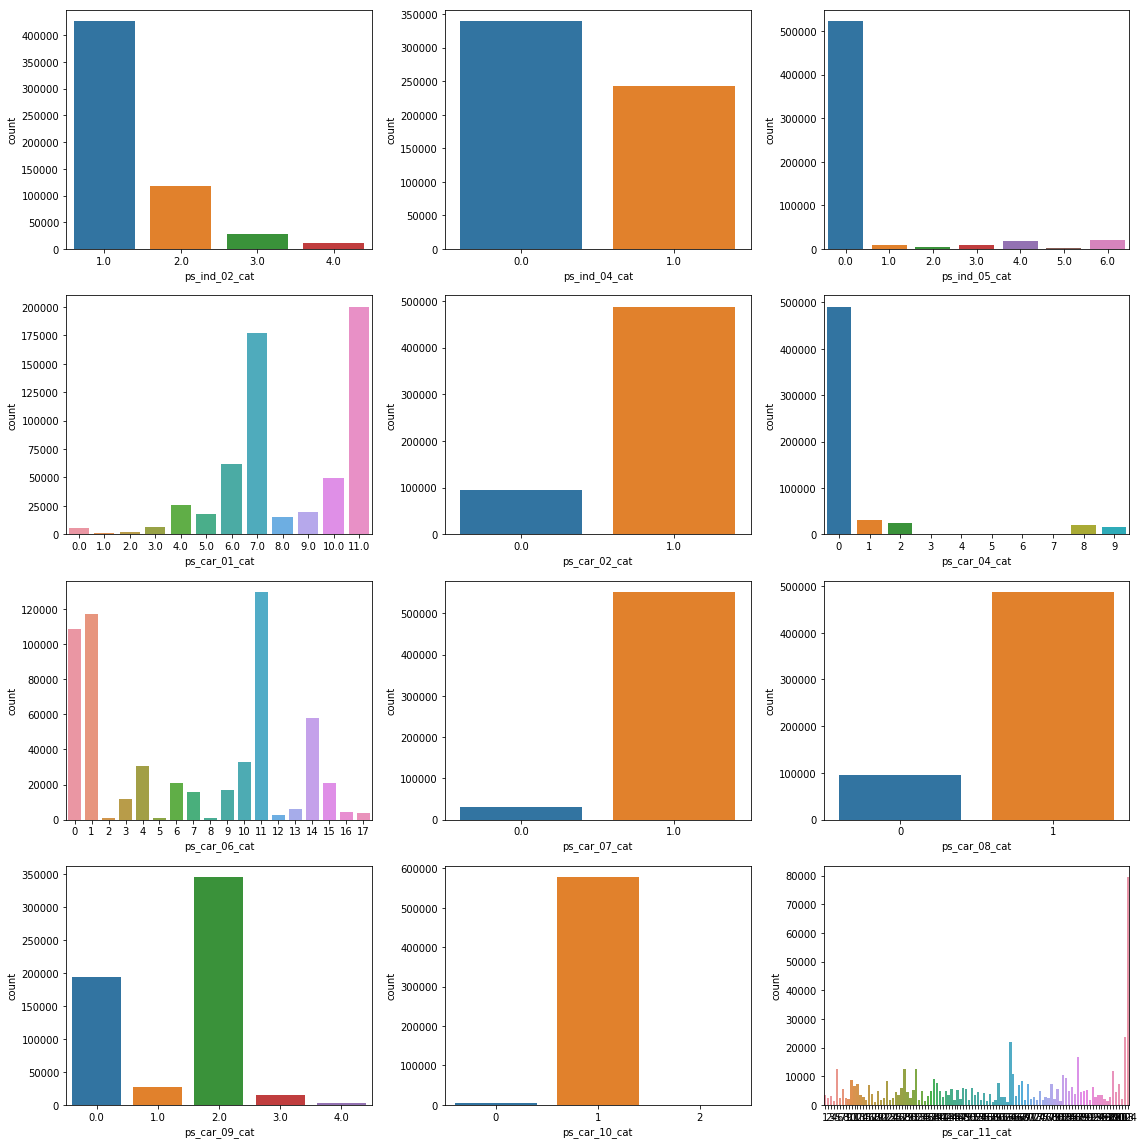

In [53]:
fig , axes = plt.subplots(nrows=4,ncols=3,figsize=(16,16))
for i , colname in enumerate(cat_col):
    sns.countplot(colname,data=X_cat,ax=fig.axes[i])
plt.tight_layout()

#### Binaires

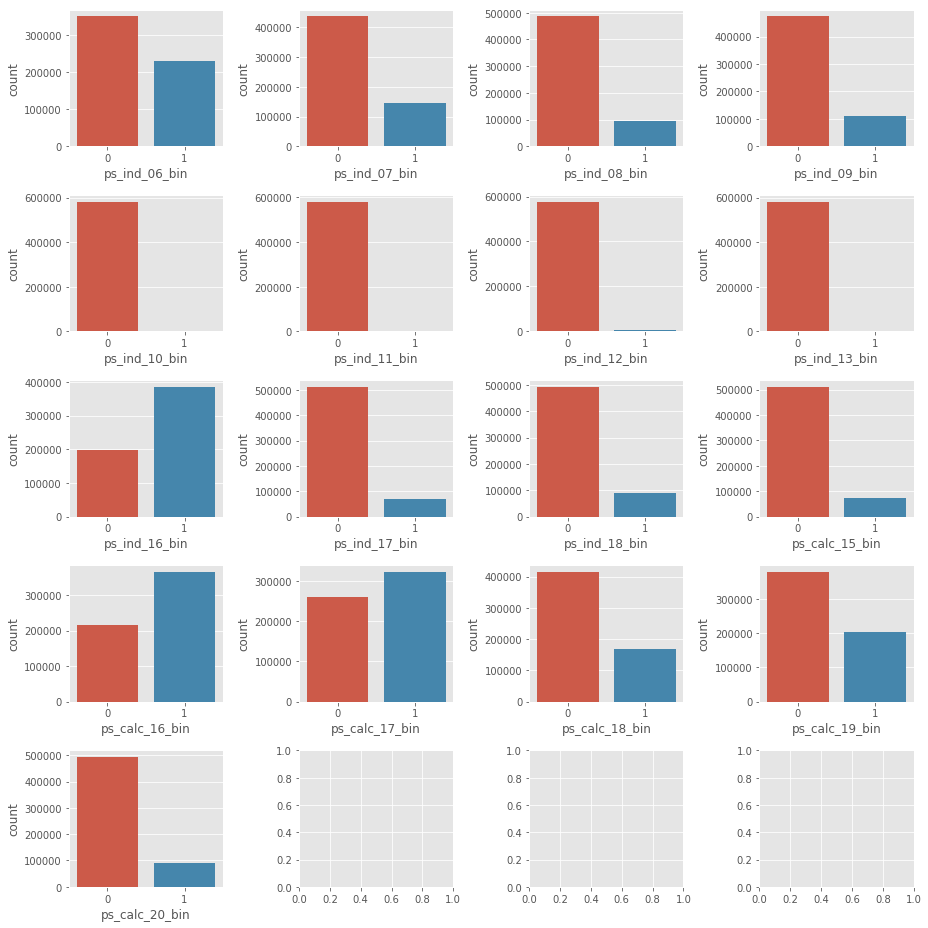

In [61]:
fig , axes = plt.subplots(nrows=5,ncols=4,figsize=(13,13))
for i , colname in enumerate(bin_col):
    sns.countplot(colname,data=X_bin,ax=fig.axes[i])
plt.tight_layout()

### Distribution de la variable cible

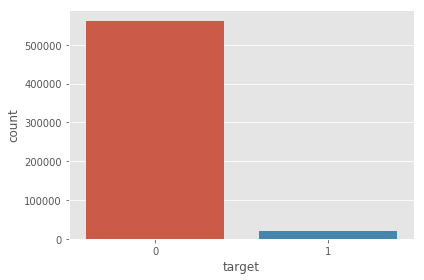

In [58]:
#f, axes = plt.subplots(2, 4, figsize=(10, 7), sharex=False)
plt.style.use('ggplot')
sns.despine(left=True)
sns.countplot(x=y, data=X_bin)

# plt.setp(axes, yticks=[])
plt.tight_layout()
donnees.target
#Mettre les valeurs

In [62]:
X_bin.columns

Index(['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin',
       'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='object')